<a href="https://colab.research.google.com/github/Anidafio/4105_hw2/blob/main/hw2_p1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Anidafio/4105_hw2/main/Housing.csv'

housing = pd.read_csv(url)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
#housing.head()

In [3]:
#split train and test data
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [4]:
#
variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_train = df_train[variables].copy().values
y_train = df_train[['price']].copy().values

X_val = df_test[variables].copy().values
y_val = df_test[['price']].copy().values

m = len(y_train)

In [5]:
X_b_train = np.insert(X_train, 0, 1, axis=1)
X_b_val = np.insert(X_val, 0, 1, axis=1)

theta = np.zeros((X_b_train.shape[1], 1))
iterations = 1000
alpha = 0.01

In [6]:
train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#overflow error with learning rate 0.01
#if learning rate decreased to 0.00000001, error will not appear

<ipython-input-6-3f22ac7ab25f>:8: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
<ipython-input-6-3f22ac7ab25f>:9: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))
<ipython-input-6-3f22ac7ab25f>:6: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


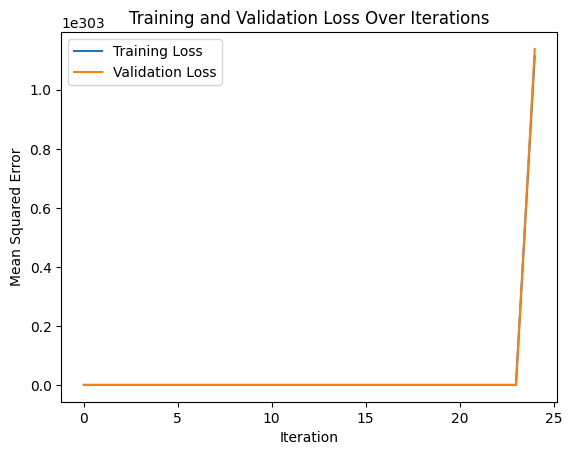

In [7]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()